# Exercise  2 - LTI systems

## Objectives
- To investigate properties of LTI systems
- To learn about the different representations of LTI systems
- To understand the concept of convolution


In [65]:
import os
os.makedirs('results/ex2', exist_ok=True)

## Lab Exercise

### Impulse response representation
<img src="img/ex2b_1.svg" alt="Drawing" style="width: 900px;"/>
<center>Figure 2.1: Impulse response of a LTI system</center>

Suppose we apply a unit impulse function, $\delta[n]$, as an input to a Linear Time-Invariant (LTI) system. The output is the impulse response of the digital system, $h[n]$, as shown  in  Fig. 2.1. Since the discrete-time system is time-invariant, the filter response to $\delta[n-k]$ is $h[n-k]$. 

In general, any input signal $x[n]$ can be decomposed into signal values at each time sample, i.e.

$$ x[n]=\big[x[0]\delta[n], {x[1]\delta[n-1]}, \cdots, {x[N]\delta[n-N]}\big]$$
Consequently, the filter output is 

$$\boldsymbol{y}[n]=x[0]h[n]+x[1]{h[n-1]}+\cdots+x[N]{h[n-N]}$$
This is defined as **linear convolution**.

#### Example
Consider a sequence of unit impulses of length $(N+1)$ as the input, $\big[\delta[n],{\delta[n-1]},\cdots,{\delta[n-N]}\big]$. Due to linearity, the response of the digital filter will be the sum of the outputs i.e. $y[n]=h[n]+{h[n-1]}+\cdots+{h[n-N]}$. 

<img src="img/ex5_2.svg" alt="Drawing" style="width: 900px;"/>
<center>Figure 2.2: Linear convolution in time domain</center>

---
####  Definition
$$\text{Linear Convolution: }y[n]=x[n]*h[n]\overset{\Delta}{=}\sum^\infty_{k=-\infty}x[k]h[n-k]$$

---

If we substitute $r$ for $n-k$ this becomes:
$$y[n]=\sum_{r=-\infty}^{\infty}h[r]x[n-r]$$

Thus, for any linear time-invariant (LTI) filter, the output values consist of the sum of the past input values, weighted by the elements of the impulse response $h[n]$. This has been shown in Fig. 2.2. 

**Question 2.1** What information is needed in order to compute the output of a discrete-time LTI system?

The impulse response of the system $h[n]$.



**Question 2.2** Implement a linear convolution using your own `my_conv` function in the cell below. Verify that it gives you the correct result using the example in Fig 2.2.
> **GTA Tip**
>
> - The length of `y` is always `len(x)+len(h)-1`.
> - You can shift all elements of the array `x` by `nshift` elements using `np.roll(x,nshift)`.
> - You can multiply all alements of the array `x` by a scalar `c` using `x*c`.
> - You can verify that your implementation is correct by using the `np.convolve()` function.

In [66]:
import numpy as np

def my_conv(x,h):
    y=np.zeros((len(x)+len(h)-1)) # This is always true
    H=np.append(h, np.zeros(len(x)-1)) # append H with zeros so that len(H)=len(y)
    X=np.append(x, np.zeros(len(h)-1)) # append X with zeros so that len(X)=len(y)
    
    for i in range(len(x)):
        
        xi_contribution=X[i] # add your code here 

        tmpy = xi_contribution * H

        y = np.add(y, tmpy) # add your code here
        
        H = np.roll(H, 1)
        
    return y
    
x = [2, 3, -2]
h = [1, -0.5]

print(my_conv(x, h))

[ 2.   2.  -3.5  1. ]


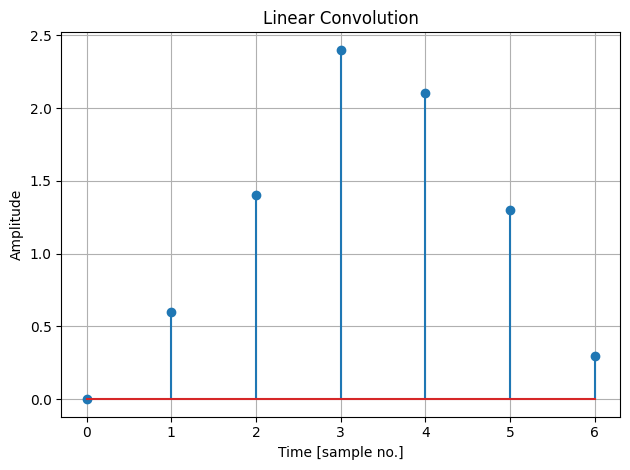

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from functions.lab_functions import plot_signal

x=[0,1,1,1] # this is the example in Fig 2.2
h = [0.6, 0.8, 1, 0.3] # this is the example in Fig 2.2

y=my_conv(x,h)

plt = plot_signal(y, title='Linear Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex2/ex2_linear_convolution.pdf')
plt.show()

**Question 2.3** What will the output `y` be if you change `x` to `[0,0,0,1,1,1]`? Check your answer using `my_conv`.

Should shift in the $x$ direction

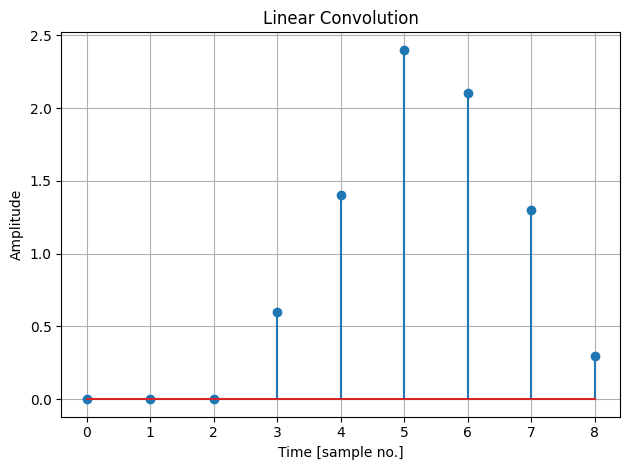

In [68]:
x = [0, 0, 0, 1, 1, 1]

y = my_conv(x, h)

plt = plot_signal(y, title='Linear Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex2/ex2_linear_convolution_2.pdf')
plt.show()

**Question 2.4** Similarly, what will the output `y` be if you change `x` to `[0, 2, 2, 2]`?

Should stretch in the $y$ direction

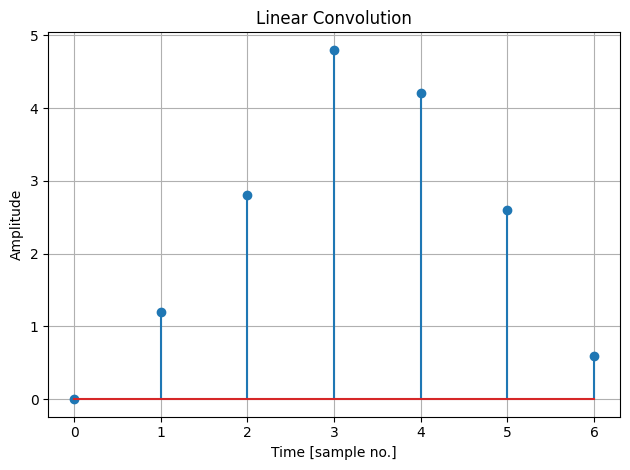

In [69]:
x = [0, 2, 2, 2]

y = my_conv(x, h)

plt = plot_signal(y, title='Linear Convolution', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
plt.savefig('results/ex2/ex2_linear_convolution_3.pdf')
plt.show()

### Difference equation representation

You have seen in lectures that discrete-time LTI systems can also be represented using difference equations, i.e.
$$ \sum_{k=0}^N a_ky[n-k]=\sum_{k=0}^{M}b_k x[n-k]$$
where $a_k$ and $b_k$ are constant coefficients. This forms shows how the output at time $n$, $y[n]$, can be obtained as a weighted sum of past outputs and past and present inputs to the system.

**Question 2.5** Given a system with $a_0=1$, $a_1=-0.25$, $b_0=1$ and all other coefficients zero, write its difference equation.
\
\
$y[n] = x[n] + 0.25y[n - 1]$

**Question 2.6** Compute the output the system for $x[n]=\delta[n]$ using Python. Calculate $N=5$ output values and assume zero initial conditions. What is the function that you obtain?

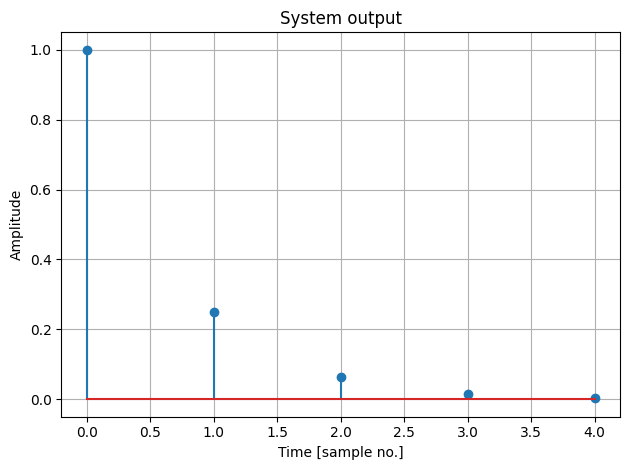

for N =  5: 0.00390625


In [70]:

def diff_eq(N):
    ic=0 # zero initial conditions
    y=[]
    x=np.concatenate((np.ones(1),np.zeros(N-1)))
    prev_val = ic
    for i in range(N):
        y.append(x[i] + 0.25*prev_val)
        prev_val = y[i]
    # add your code here
    
    plt = plot_signal(y, title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
    plt.savefig('results/ex2/ex2_difference_equation'+str(N)+'.pdf')
    plt.show()

    print("for N =  " + str(N) + ": " + str(y[len(y) - 1]))

diff_eq(5)


**Question 2.7** Increase the value of $N$ to i) 10, ii) 50 iii) 100 and examine the last value of `y` using `print(y[N-1])`. What can you say about this system?
\
\
Natural response is 0

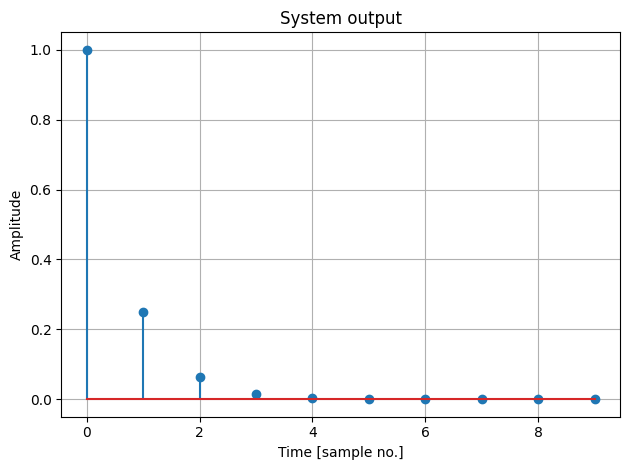

for N =  10: 3.814697265625e-06


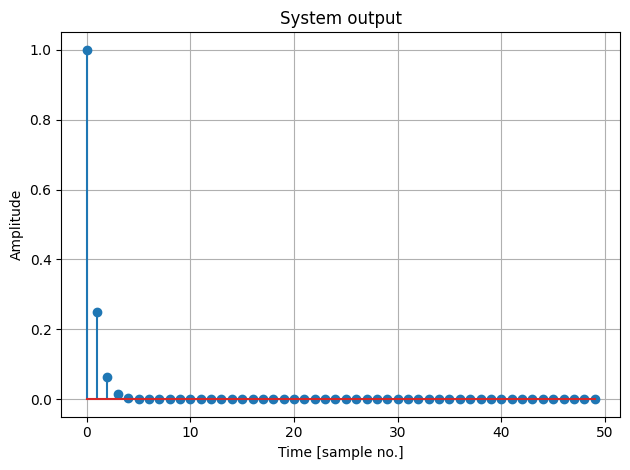

for N =  50: 3.1554436208840472e-30


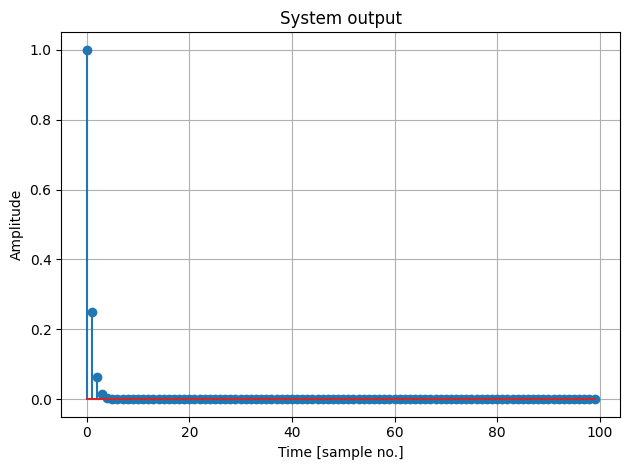

for N =  100: 2.4892061111444567e-60


In [71]:
diff_eq(10)
diff_eq(50)
diff_eq(100)

**Question 2.8** Change your code to have $x[n]=0$ and $y[-1]=2$. Compare your plot to Exercise 12 of Problem Sheet 2.

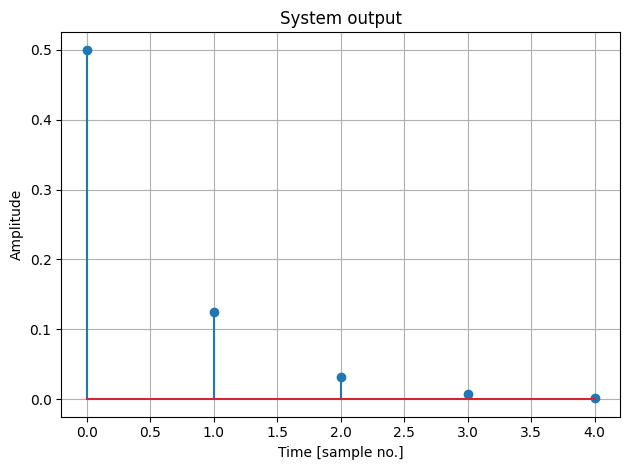

for N =  5: 0.001953125


In [72]:
def diff_eq_2(N):
    ic=2 # zero initial conditions
    y=[]
    x=np.zeros(N)
    prev_val = ic
    for i in range(N):
        y.append(x[i] + 0.25*prev_val)
        prev_val = y[i]
    # add your code here
    
    plt = plot_signal(y, title='System output', xlabel='Time [sample no.]', ylabel='Amplitude', func='stem')
    plt.savefig('results/ex2/ex2_difference_equation_2_'+str(N)+'.pdf')
    plt.show()

    print("for N =  " + str(N) + ": " + str(y[len(y) - 1]))

diff_eq_2(5)
